In [1]:
import os
os.getcwd()

'C:\\Users\\Dell\\Downloads\\BankingDomain'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import sklearn
import scipy

from pylab import rcParams
#graph resolution
rcParams['figure.figsize'] = 16,12
#fixing random number
RANDOM_SEED = 101
#labels as its binary classification thats why its decleared
LABELS = ['Normal','Fraud']

In [5]:
data = pd.read_csv('CreditCard (2).csv')

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#data preprocesing
#step 01 - handling missing data
data.isnull().sum()
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
#step 02 - encoding concepts
#label encoder - char to num
#onehotencoder - split data into variables basis binary value
#dummy variables - to avoid multicolinearity problem

#as in this we dont have char variable no need of encoding

In [13]:
#step 03 - outlier treatment
#as this is the classificaton problem theres no need for outlier attention
#as the value only falls between 0 and 1 
#and credit card fraud requires the outliers as we want to knpw the fraud 

In [14]:
#step 04 - feature scaling
#in this we dont require that much feature scalling as its very convinient data

In [15]:
#step 05 - check balance and imbalance data
#here we want the data to be imbalance as the fraud amt which is less is much more important 
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

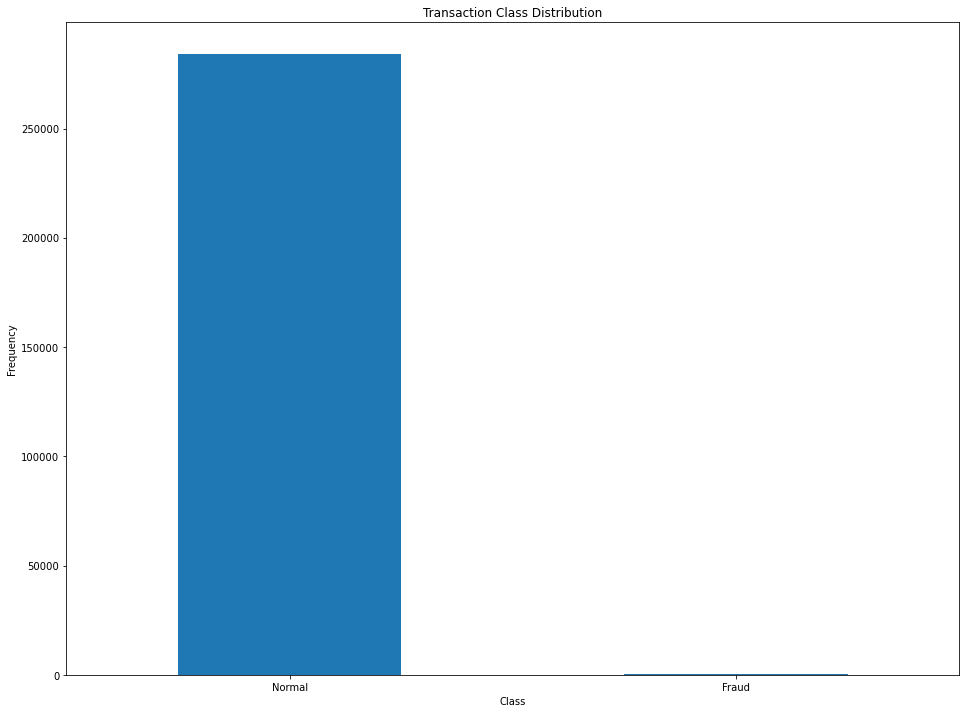

In [16]:
count_classes = pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind = 'bar',rot = 0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [17]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [18]:
#we have calculated the max and min transactions from normal as well as fraud transactions
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

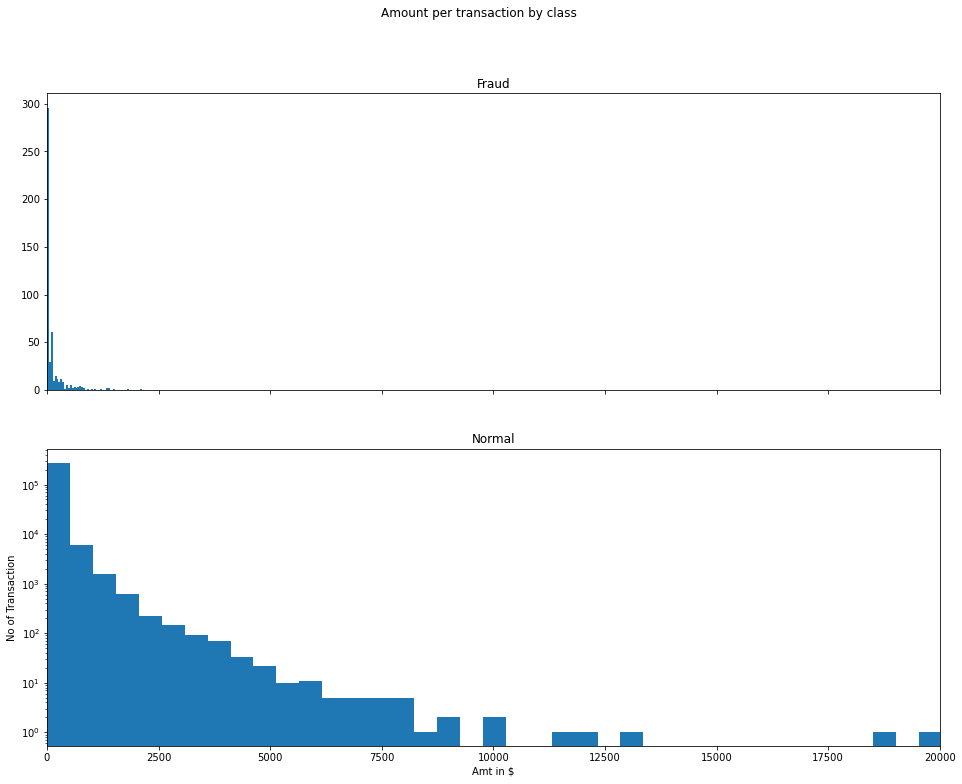

In [23]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount,bins=bins)
ax2.set_title('Normal')

plt.xlabel('Amt in $')
plt.ylabel('No of Transaction')

plt.xlim(0,20000)
plt.yscale('log')
plt.show()

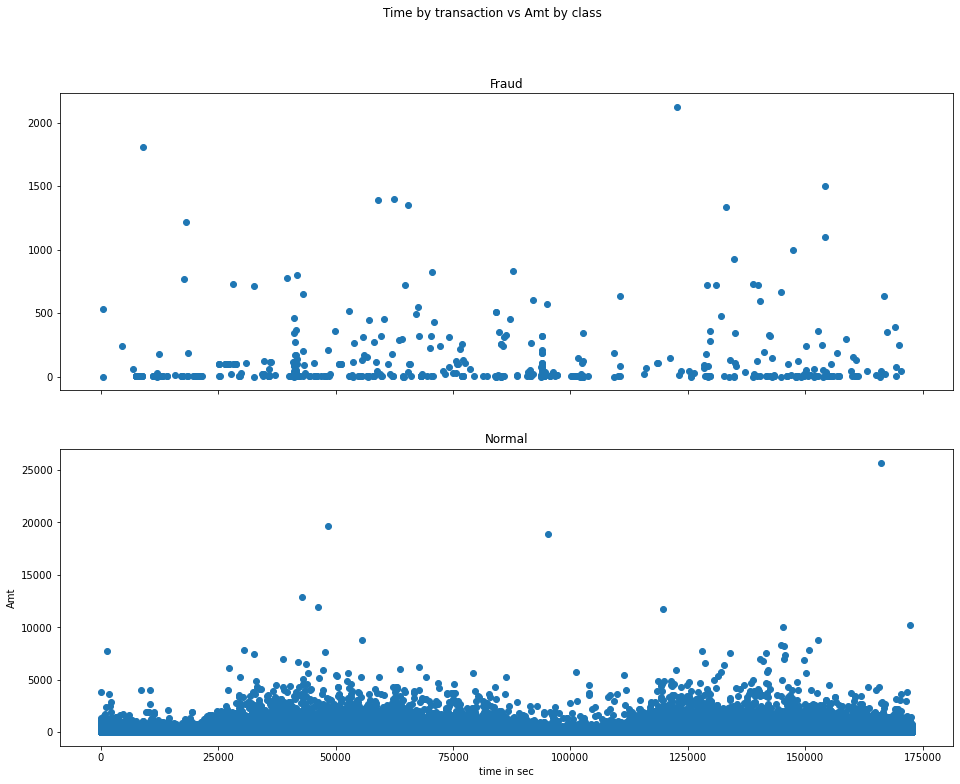

In [26]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Time by transaction vs Amt by class')

ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')

plt.xlabel('time in sec')
plt.ylabel('Amt')

plt.show()

<AxesSubplot:xlabel='Time', ylabel='Density'>

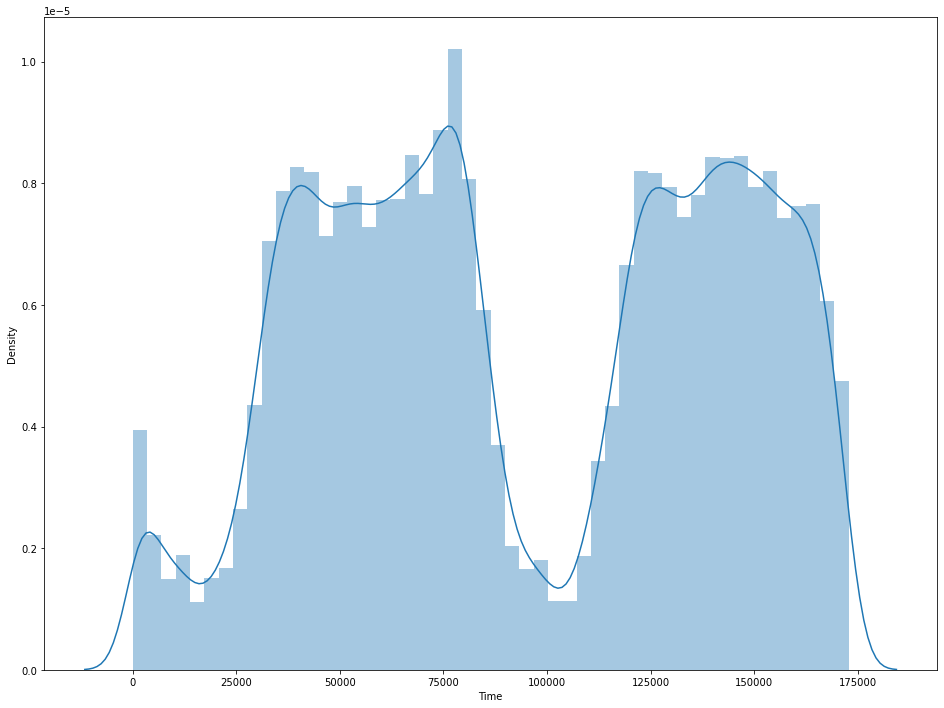

In [27]:
sns.distplot(data['Time'])

In [28]:
#taking 10 percent data to build model for saving time just for trying purpose

In [29]:
data1 = data.sample(frac = 0.1,random_state = 1)
data1.shape

(28481, 31)

In [31]:
fraud = data1[data1['Class']==1]
normal = data1[data1['Class']==0]

print(fraud.shape,normal.shape)

(49, 31) (28432, 31)


In [32]:
data1.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0


In [34]:
outlier_faction = len(fraud)/float(len(normal))
outlier_faction

0.0017234102419808666

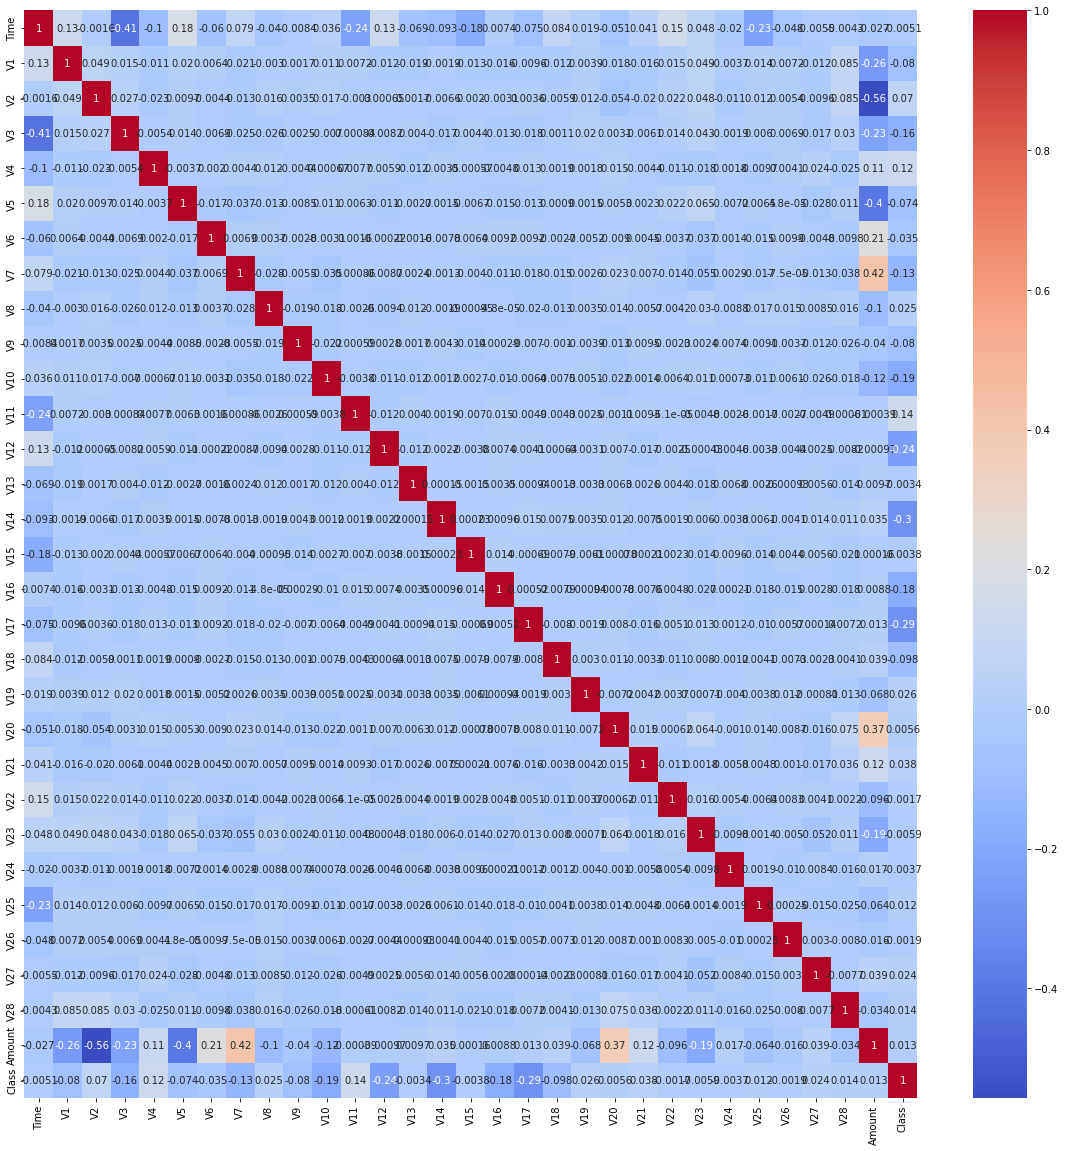

In [36]:
#correlation part

corrmat = data1.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data1[top_corr_feature].corr(),annot=True,cmap='coolwarm')

In [37]:
columns = data1.columns.tolist()

In [38]:
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [42]:
#splitting the data into feature/independent variables and target/dependent variables
#this method is complex sometimes used in automation by experienced programmer

columns = [c for c in columns if c not in ['Class']]
target = 'Class'
state = np.random.RandomState(101)
x = data1[columns]
y = data1[target]
x_outlier = state.uniform(low=0,high=1,size=(x.shape[0],x.shape[1]))

print(x.shape,y.shape)


(28481, 30) (28481,)


In [43]:
#LOGISTIC REGRESSION

In [44]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state=110)

In [45]:
X_train.shape

(19936, 30)

In [46]:
X_test.shape

(8545, 30)

In [47]:
from sklearn.linear_model import LogisticRegression

In [49]:
logit = LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred_train = logit.predict(X_train)

In [52]:
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
y_pred_test = logit.predict(X_test)

In [53]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
print(classification_report(y_train,y_pred_train))
print('-'*50)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19902
           1       0.64      0.47      0.54        34

    accuracy                           1.00     19936
   macro avg       0.82      0.74      0.77     19936
weighted avg       1.00      1.00      1.00     19936

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       0.82      0.60      0.69        15

    accuracy                           1.00      8545
   macro avg       0.91      0.80      0.85      8545
weighted avg       1.00      1.00      1.00      8545



In [62]:
print(accuracy_score(y_train,y_pred_train))
print('-'*20)
print(accuracy_score(y_test,y_pred_test))

0.9986456661316212
--------------------
0.9990637799882972


In [65]:
print(confusion_matrix(y_train,y_pred_train))
print('-'*15)
print(confusion_matrix(y_test,y_pred_test))

[[19893     9]
 [   18    16]]
---------------
[[8528    2]
 [   6    9]]


In [ ]:
#decision tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [68]:
y_pred_dt_train = dtree.predict(X_train)
y_pred_dt_test = dtree.predict(X_test)

In [69]:
print(accuracy_score(y_train,y_pred_dt_train))
print('-'*20)
print(accuracy_score(y_test,y_pred_dt_test))

1.0
--------------------
0.9988297249853716


In [70]:
print(confusion_matrix(y_train,y_pred_dt_train))
print('-'*15)
print(confusion_matrix(y_test,y_pred_dt_test))

[[19902     0]
 [    0    34]]
---------------
[[8529    1]
 [   9    6]]


In [71]:
print(classification_report(y_train,y_pred_dt_train))
print('-'*50)
print(classification_report(y_test,y_pred_dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19902
           1       1.00      1.00      1.00        34

    accuracy                           1.00     19936
   macro avg       1.00      1.00      1.00     19936
weighted avg       1.00      1.00      1.00     19936

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       0.86      0.40      0.55        15

    accuracy                           1.00      8545
   macro avg       0.93      0.70      0.77      8545
weighted avg       1.00      1.00      1.00      8545



In [72]:
from sklearn import tree

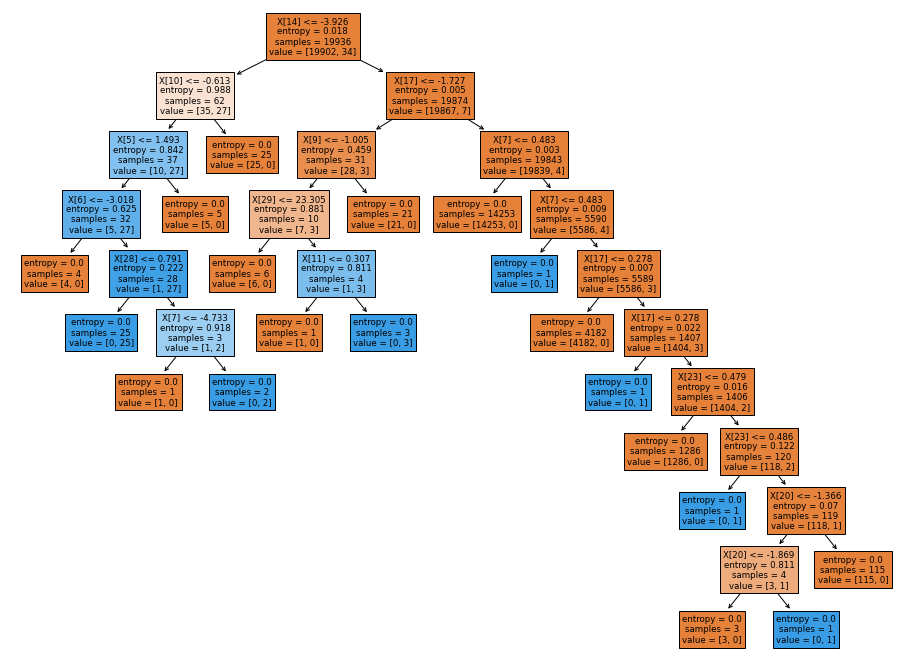

In [74]:
tree.plot_tree(dtree,filled = True)
plt.show()

In [75]:
#random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc = RandomForestClassifier( n_estimators=500,criterion='entropy')

In [79]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [80]:
y_pred_rfc_train = rfc.predict(X_train)
y_pred_rfc_test = rfc.predict(X_test)

In [81]:
print(confusion_matrix(y_train,y_pred_rfc_train))
print('-'*15)
print(confusion_matrix(y_test,y_pred_rfc_test))

[[19902     0]
 [    0    34]]
---------------
[[8530    0]
 [   6    9]]


In [82]:
print(accuracy_score(y_train,y_pred_rfc_train))
print('-'*20)
print(accuracy_score(y_test,y_pred_rfc_test))

1.0
--------------------
0.9992978349912229


In [83]:
print(classification_report(y_train,y_pred_rfc_train))
print('-'*50)
print(classification_report(y_test,y_pred_rfc_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19902
           1       1.00      1.00      1.00        34

    accuracy                           1.00     19936
   macro avg       1.00      1.00      1.00     19936
weighted avg       1.00      1.00      1.00     19936

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       1.00      0.60      0.75        15

    accuracy                           1.00      8545
   macro avg       1.00      0.80      0.87      8545
weighted avg       1.00      1.00      1.00      8545



In [84]:
#XGBoost

In [85]:
!pip install xgboost

In [86]:
from xgboost import XGBClassifier

In [87]:
xgb_classifier = XGBClassifier()

In [88]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [89]:
y_pred_xgb_train = xgb_classifier.predict(X_train)
y_pred_xgb_test = xgb_classifier.predict(X_test)

In [90]:
print(classification_report(y_train,y_pred_xgb_train))
print('-'*50)
print(classification_report(y_test,y_pred_xgb_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19902
           1       1.00      1.00      1.00        34

    accuracy                           1.00     19936
   macro avg       1.00      1.00      1.00     19936
weighted avg       1.00      1.00      1.00     19936

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       0.90      0.60      0.72        15

    accuracy                           1.00      8545
   macro avg       0.95      0.80      0.86      8545
weighted avg       1.00      1.00      1.00      8545



In [91]:
print(accuracy_score(y_train,y_pred_xgb_train))
print('-'*20)
print(accuracy_score(y_test,y_pred_xgb_test))

1.0
--------------------
0.9991808074897601


In [92]:
#stacking classifier

In [93]:
!pip install mlxtend

In [94]:
from mlxtend.classifier import StackingClassifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [101]:
from sklearn.model_selection import cross_val_score

clf1 = KNeighborsClassifier()
clf3 = RandomForestClassifier()
clf2 = GaussianNB()
clf4 = LogisticRegression()
clf5 = DecisionTreeClassifier()
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3,clf5],meta_classifier=clf4)

print('3-fold cross validation :\n')

for clf,label in zip([clf1,clf2,clf3,clf4,sclf],['KNN','NaiveBayes','RF','LR','StackingCla']):
    scores = cross_val_score(clf,x,y,cv=3,scoring='accuracy')
    print('Accuracy : %0.2f (+/-%0.2f)[%s]'%(scores.mean(),scores.std(),label))

3-fold cross validation :

Accuracy : 1.00 (+/-0.00)[KNN]
Accuracy : 0.99 (+/-0.00)[NaiveBayes]
Accuracy : 1.00 (+/-0.00)[RF]
Accuracy : 1.00 (+/-0.00)[LR]
Accuracy : 1.00 (+/-0.00)[StackingCla]


In [ ]:
#Isolation forest and local ouliers factor

In [103]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [109]:
Classification = {"IsolationForest" : IsolationForest(n_estimators=100,max_samples=len(x),contamination=outlier_faction),
                "LocalOutlierFactor" : LocalOutlierFactor(n_neighbors=20,contamination=outlier_faction),
                "OneClassSVM" : OneClassSVM()}

In [110]:
n_outlier = len(fraud)

for i, (clf_name, clf) in enumerate(Classification.items()):
    if clf_name =='LocalOutlierFactor' :
        y_pred = clf.fit_predict(x)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name =="OneClassSVM" :
        clf.fit(x)
        y_pred = clf.predict(x)
        
    else:
        clf.fit(x)
        score_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    y_pred[y_pred==1]= 0
    y_pred[y_pred==-1] = 1
    n_error = (y_pred !=y).sum()
    
    
    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")
    
    print(accuracy_score(y, y_pred))
    print("Classification Report :")
    print(classification_report(y, y_pred))

IsolationForest : 75
Accuracy Score :
0.9973666654962958
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.24      0.24      0.24        49

    accuracy                           1.00     28481
   macro avg       0.62      0.62      0.62     28481
weighted avg       1.00      1.00      1.00     28481

LocalOutlierFactor : 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

OneClassSVM : 14238
Accuracy Score :
0.5000877778167901
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.50      0.67   